In [5]:
import gensim
from gensim.models import KeyedVectors
import nltk
# nltk.download()
from nltk.corpus import brown, stopwords

stopwords_list = stopwords.words('english')

# Calculate unigram frequency on brown corpus
fdist = nltk.FreqDist(w.lower() for w in brown.words() if w.lower() not in stopwords_list and any(c.isalpha() for c in w.lower()))

# Get most common 5000 word frequency pairs
W = fdist.most_common(5000)

print(len(W))


5000


In [6]:
# Get the top 5000 frequent words
commonWords = [word[0] for word in W]

# List of theme words in RG65
themeWords = ["asylum", "gem", "autograph", "glass", "boy", "graveyard", "brother", "grin", "car", "mound", "coast", "noon", "cock", "oracle", 
              "cord", "slave", "crane", "tool", "cushion", "voyage", "food", "wizard", "furnace", "woodland",
              "automobile", "midday", "bird", "monk", "cemetery", "pillow", "forest", "rooster", "fruit", "sage", "hill", "serf", "implement", "shore",
              "jewel", "signature", "journey", "smile", "lad", "stove", "madhouse", "string", "magician", "tumbler"]

# Add theme words to W if not already in top 5000 frequency
for word in themeWords:
    if word not in commonWords:
        print((word,fdist[word]))
        W.append((word, fdist[word]))

print(len(W))
wWords = [word[0] for word in W]
print(len(wWords))


('asylum', 1)
('gem', 4)
('autograph', 3)
('graveyard', 7)
('grin', 13)
('mound', 11)
('cock', 5)
('oracle', 2)
('cord', 6)
('crane', 5)
('cushion', 8)
('voyage', 17)
('wizard', 3)
('furnace', 11)
('woodland', 2)
('midday', 5)
('monk', 16)
('cemetery', 15)
('pillow', 8)
('rooster', 3)
('sage', 2)
('serf', 0)
('implement', 4)
('jewel', 1)
('signature', 6)
('lad', 6)
('stove', 15)
('madhouse', 1)
('magician', 4)
('tumbler', 2)
5030
5030


In [7]:
# Construct frequency matrix for bigrams
import numpy as np
from scipy.sparse import csr_matrix

bigrams = nltk.bigrams(w.lower() for w in brown.words() if w.lower() not in stopwords_list and any(c.isalpha() for c in w.lower()))
fdist = nltk.FreqDist(bigrams)
# print(fdist[("the", "man")])

denseFreqMatrix = [[float(fdist[(wWords[col], wWords[row])]) for col in range(len(wWords))] for row in range(len(wWords))] 
M1 = csr_matrix(denseFreqMatrix)

# print(sparseFreqMatrix)
# freqMatrix = nltk.ConditionalFreqDist()
# for bigram, freq in fdist.items():
#     word = bigram[0].lower()
#     context = bigram[1].lower()
#     if word in wWords and context not in stopwords_list and any(c.isalpha() for c in context):
#         freqMatrix[word][context] = freq

In [8]:
print(M1)

  (0, 0)	12.0
  (0, 1)	6.0
  (0, 2)	17.0
  (0, 3)	9.0
  (0, 4)	2.0
  (0, 5)	11.0
  (0, 6)	5.0
  (0, 7)	7.0
  (0, 8)	7.0
  (0, 9)	14.0
  (0, 10)	8.0
  (0, 11)	2.0
  (0, 12)	13.0
  (0, 13)	8.0
  (0, 14)	2.0
  (0, 16)	3.0
  (0, 17)	5.0
  (0, 18)	2.0
  (0, 20)	10.0
  (0, 21)	7.0
  (0, 22)	4.0
  (0, 24)	4.0
  (0, 25)	4.0
  (0, 26)	16.0
  (0, 27)	12.0
  :	:
  (5022, 1127)	1.0
  (5022, 1859)	1.0
  (5023, 1992)	1.0
  (5024, 57)	1.0
  (5024, 72)	1.0
  (5024, 1006)	1.0
  (5025, 592)	1.0
  (5025, 1587)	1.0
  (5025, 2909)	1.0
  (5025, 3147)	1.0
  (5026, 0)	1.0
  (5026, 24)	1.0
  (5026, 115)	1.0
  (5026, 690)	1.0
  (5026, 931)	1.0
  (5026, 1627)	2.0
  (5026, 1906)	1.0
  (5026, 2109)	1.0
  (5026, 2166)	1.0
  (5026, 2404)	1.0
  (5027, 3857)	1.0
  (5028, 177)	1.0
  (5028, 606)	1.0
  (5029, 26)	1.0
  (5029, 3483)	1.0


In [9]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

finder = BigramCollocationFinder.from_words(w.lower() for w in brown.words() if w.lower() not in stopwords_list and any(c.isalpha() for c in w.lower()))
bgm = BigramAssocMeasures()
score = bgm.pmi

In [10]:
# Construct PPMI matrix for bigrams
M1_plus = M1.copy()

for r in range(M1_plus.shape[0]):
    for ind in range(M1_plus.indptr[r], M1_plus.indptr[r+1]):
        print(wWords[M1_plus.indices[ind]], wWords[r])
        M1_plus.data[ind] = max(0, finder.score_ngram(score, wWords[M1_plus.indices[ind]], wWords[r]))

print(M1_plus)
# densePPMIMatrix = [[finder.score_ngram(score, wWords[col], wWords[row]) for col in range(len(wWords))] for row in range(len(wWords))] 
# M1_plus = csr_matrix(densePPMIMatrix)

# ppmiMatrix = nltk.ConditionalFreqDist()
# for bigram, pmi in finder.score_ngrams(score):
#     word = bigram[0].lower()
#     context = bigram[1].lower()
#     if word in wWords and context not in stopwords_list and any(c.isalpha() for c in context):
#         ppmiMatrix[word][context] = max(0,pmi)

one one
would one
said one
new one
could one
time one
two one
may one
first one
like one
man one
even one
made one
also one
many one
af one
back one
years one
way one
well one
people one
little one
state one
good one
make one
world one
still one
see one
men one
work one
long one
get one
life one
never one
day one
another one
know one
last one
us one
might one
old one
year one
come one
since one
go one
came one
right one
used one
take one
three one
house one
use one
without one
place one
american one
around one
however one
home one
small one
found one
thought one
went one
say one
part one
high one
upon one
school one
every one
got one
left one
number one
course one
war one
always one
away one
something one
fact one
water one
though one
public one
less one
put one
almost one
hand one
enough one
took one
far one
head one
yet one
system one
set one
better one
told one
night one
nothing one
end one
find one
going one
look one
asked one
later one
knew one
point one
program one
city one
give 

In [11]:
# Apply Principle Component Analysis to M1_plus
from sklearn.decomposition import PCA
M2_10 = PCA(n_components=10).fit_transform(M1_plus.toarray())
print(M2_10.shape)
M2_100 = PCA(n_components=100).fit_transform(M1_plus.toarray())
print(M2_100.shape)
M2_300 = PCA(n_components=300).fit_transform(M1_plus.toarray())
print(M2_300.shape)

(5030, 10)
(5030, 100)
(5030, 300)


In [22]:
# Get pairs of words in RG65
P = [("cord", "smile"), ("rooster", "voyage"), ("noon", "string"), ("fruit", "furnace"), ("autograph", "shore"), ("automobile", "wizard"), ("mound", "stove"), ("grin", "implement"), ("asylum", "fruit"), ("asylum", "monk"),
     ("graveyard", "madhouse"), ("glass", "magician"), ("boy", "rooster"), ("cushion", "jewel"), ("monk", "slave"), ("asylum", "cemetery"), ("coast", "forest"), ("grin", "lad"), ("shore", "woodland"), ("monk", "oracle"),
     ("boy", "sage"), ("automobile", "cushion"), ("mound", "shore"), ("lad", "wizard"), ("forest", "graveyard"), ("food", "rooster"), ("cemetery", "woodland"), ("shore", "voyage"), ("bird", "woodland"), ("coast", "hill"),
     ("furnace", "implement"), ("crane", "rooster"),
     ("hill", "woodland"),  ("car", "journey"), ("cemetery", "mound"),  ("glass", "jewel"),  ("magician", "oracle"), ("crane", "implement"), ("brother", "lad"), ("sage", "wizard"), ("oracle", "sage"), ("bird", "crane"),
     ("bird", "cock"), ("food", "fruit"), ("brother", "monk"), ("asylum", "madhouse"), ("furnace", "stove"), ("magician", "wizard"), ("hill", "mound"), ("cord", "string"), ("glass", "tumbler"), ("grin", "smile"), 
     ("serf", "slave"), ("journey", "voyage"), ("autograph", "signature"), ("coast", "shore"), ("forest", "woodland"), ("implement", "tool"), ("cock", "rooster"), ("boy", "lad"), ("cushion", "pillow"), ("cemetery", "graveyard"),
     ("automobile", "car"), ("midday", "noon"), ("gem", "jewel")]

S = [0.02, 0.04, 0.04, 0.05, 0.06, 0.11, 0.14, 0.18, 0.19, 0.39, 0.42, 0.44, 0.44, 0.45, 0.57, 0.79, 0.85, 0.88, 0.90, 0.91, 0.96, 0.97, 0.97, 0.99, 1.00, 1.09, 1.18, 1.22, 1.24, 1.26, 1.37, 1.41, 
     1.48, 1.55, 1.69, 1.78, 1.82, 2.37, 2.41, 2.46, 2.61, 2.63, 2.63, 2.69, 2.74, 3.04, 3.11, 3.21, 3.29, 3.41, 3.45, 3.46, 3.46, 3.58, 3.59, 3.60, 3.65, 3.66, 3.68, 3.82, 3.84, 3.88, 3.92, 3.94, 3.94]

print(len(P), len(S))

65 65


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity between pairs of words in RG65
S_M1, S_M1_plus, S_M2_10, S_M2_100, S_M2_300 = ([] for i in range(5))
for tup in P:
    word1 = tup[0]
    word2 = tup[1]
    S_M1.append((word1, word2, cosine_similarity(M1[wWords.index(word1)].reshape(1,-1), M1[wWords.index(word2)].reshape(1,-1))[0][0]))
    S_M1_plus.append((word1, word2, cosine_similarity(M1_plus[wWords.index(word1)].reshape(1,-1), M1_plus[wWords.index(word2)].reshape(1,-1))[0][0]))
    S_M2_10.append((word1, word2, cosine_similarity(M2_10[wWords.index(word1)].reshape(1,-1), M2_10[wWords.index(word2)].reshape(1,-1))[0][0]))
    S_M2_100.append((word1, word2, cosine_similarity(M2_100[wWords.index(word1)].reshape(1,-1), M2_100[wWords.index(word2)].reshape(1,-1))[0][0]))
    S_M2_300.append((word1, word2, cosine_similarity(M2_300[wWords.index(word1)].reshape(1,-1), M2_300[wWords.index(word2)].reshape(1,-1))[0][0]))

print(S_M1, "\n\n", S_M1_plus, "\n\n", S_M2_10, "\n\n", S_M2_100, "\n\n", S_M2_300)


[('cord', 'smile', 0.0), ('rooster', 'voyage', 0.0), ('noon', 'string', 0.11826247919781652), ('fruit', 'furnace', 0.0), ('autograph', 'shore', 0.0), ('automobile', 'wizard', 0.0), ('mound', 'stove', 0.0), ('grin', 'implement', 0.0), ('asylum', 'fruit', 0.0), ('asylum', 'monk', 0.0), ('graveyard', 'madhouse', 0.0), ('glass', 'magician', 0.0), ('boy', 'rooster', 0.0), ('cushion', 'jewel', 0.0), ('monk', 'slave', 0.0), ('asylum', 'cemetery', 0.0), ('coast', 'forest', 0.031887238245784724), ('grin', 'lad', 0.0), ('shore', 'woodland', 0.0), ('monk', 'oracle', 0.0), ('boy', 'sage', 0.0), ('automobile', 'cushion', 0.0), ('mound', 'shore', 0.0), ('lad', 'wizard', 0.0), ('forest', 'graveyard', 0.02985407170132661), ('food', 'rooster', 0.0), ('cemetery', 'woodland', 0.0), ('shore', 'voyage', 0.07254762501100116), ('bird', 'woodland', 0.0), ('coast', 'hill', 0.0), ('furnace', 'implement', 0.0), ('crane', 'rooster', 0.0), ('hill', 'woodland', 0.0), ('car', 'journey', 0.0900243548824392), ('cemete

In [36]:
# Calculate Pearson correlation between S and S_M1, S_M1_plus, S_M2_10, S_M2_100, S_M2_300
from scipy.stats import pearsonr
print(pearsonr(S, [x[2] for x in S_M1]), "\n", 
      pearsonr(S, [x[2] for x in S_M1_plus]), "\n", 
      pearsonr(S, [x[2] for x in S_M2_10]), "\n", 
      pearsonr(S, [x[2] for x in S_M2_100]), "\n", 
      pearsonr(S, [x[2] for x in S_M2_300]))

################################# END OF EXERCISE #################################


(0.13927676493621555, 0.26850974480531764) 
 (0.13721039378671426, 0.2757457362801827) 
 (0.08115185141574145, 0.5204619610651127) 
 (0.17828310497945588, 0.1553497336522897) 
 (0.19388338597484214, 0.12173481558220456)


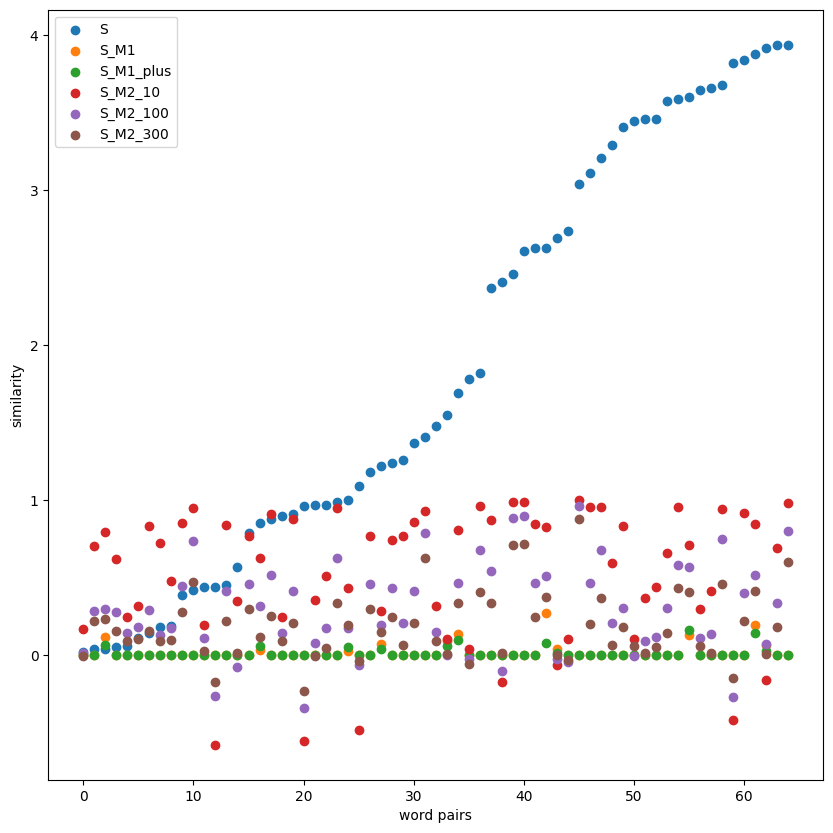

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(range(65), S, label="S")
plt.scatter(range(65), [x[2] for x in S_M1], label="S_M1")
plt.scatter(range(65), [x[2] for x in S_M1_plus], label="S_M1_plus")
plt.scatter(range(65), [x[2] for x in S_M2_10], label="S_M2_10")
plt.scatter(range(65), [x[2] for x in S_M2_100], label="S_M2_100")
plt.scatter(range(65), [x[2] for x in S_M2_300], label="S_M2_300")
plt.legend()
plt.xlabel("word pairs")
plt.ylabel("similarity")
plt.show()


In [41]:
################################# START OF LAB #################################
################################# 1. Synchronic word embedding #################################
# Load model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)
print(model)

KeyedVectors<vector_size=300, 3000000 keys>


cord smile 0.9818835500627756
rooster voyage 0.9372418969869614
noon string 0.978345487266779
fruit furnace 0.92678502202034
autograph shore 0.9653440862894058
automobile wizard 1.028087418526411
mound stove 0.7547275573015213
grin implement 1.000230542209465
asylum fruit 0.942190371453762
asylum monk 0.8613317757844925
graveyard madhouse 0.7060317993164062
glass magician 0.9627750925719738
boy rooster 0.7151480913162231
cushion jewel 0.8752155900001526
monk slave 0.8085377216339111
asylum cemetery 0.9075647965073586
coast forest 0.763902097940445
grin lad 0.7519811242818832
shore woodland 0.883090540766716
monk oracle 0.6964596509933472
boy sage 0.8340430706739426
automobile cushion 0.8664141446352005
mound shore 0.8683586865663528
lad wizard 0.6697699129581451
forest graveyard 0.7709887772798538
food rooster 0.8816935271024704
cemetery woodland 0.6180749237537384
shore voyage 0.7956514954566956
bird woodland 0.6597574949264526
coast hill 0.8388422429561615
furnace implement 0.9765705

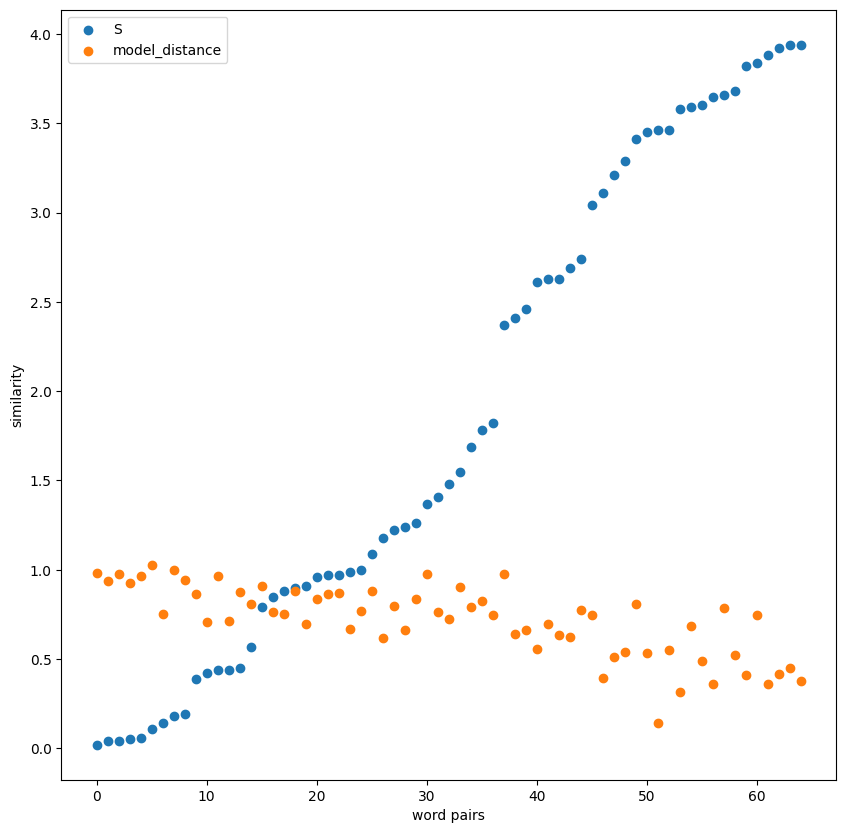

In [49]:
# For each pair of words in P, calculate the cosine distance between the word embeddings
model_distance = []
for tup in P:
    word1 = tup[0]
    word2 = tup[1]
    print(word1, word2, model.distance(word1, word2))
    model_distance.append(model.distance(word1, word2))

# Calculate Pearson correlation between S and model_distance
print(pearsonr(S, model_distance))

In [126]:
# Word analogies test with word2Vec

# Read the word analogies test file
# with open("word_analogies.txt", "r") as f:
#     analogies = f.readlines()

# for line in analogies:
#     print(line)
#     print(model.most_similar(positive=[line.split()[1], line.split()[2]], negative=[line.split()[0]]))

word2vecAnalogyScore, word2vecAnalogyScoreSection = model.evaluate_word_analogies("word_analogies.txt")
print(word2vecAnalogyScore, word2vecAnalogyScoreSection)
# read the word analogies test file
# with open("word_analogies.txt", "r") as f:
#     analogies = f.readlines()

# for index, line in enumerate(analogies):
#     for word in line.split():
#         if word not in wWords:
#             print(index+1)

0.8317757009345794 [{'section': 'Semantic-family', 'correct': [('BOY', 'GIRL', 'BROTHER', 'SISTER'), ('BOY', 'GIRL', 'FATHER', 'MOTHER'), ('BOY', 'GIRL', 'HUSBAND', 'WIFE'), ('BOY', 'GIRL', 'KING', 'QUEEN'), ('BOY', 'GIRL', 'MAN', 'WOMAN'), ('BROTHER', 'SISTER', 'FATHER', 'MOTHER'), ('BROTHER', 'SISTER', 'HUSBAND', 'WIFE'), ('BROTHER', 'SISTER', 'KING', 'QUEEN'), ('BROTHER', 'SISTER', 'MAN', 'WOMAN'), ('FATHER', 'MOTHER', 'HUSBAND', 'WIFE'), ('FATHER', 'MOTHER', 'KING', 'QUEEN'), ('FATHER', 'MOTHER', 'MAN', 'WOMAN'), ('HUSBAND', 'WIFE', 'KING', 'QUEEN'), ('HUSBAND', 'WIFE', 'MAN', 'WOMAN'), ('KING', 'QUEEN', 'MAN', 'WOMAN')], 'incorrect': []}, {'section': 'Semantic-opposite', 'correct': [('CERTAIN', 'UNCERTAIN', 'LIKELY', 'UNLIKELY'), ('FORTUNATE', 'UNFORTUNATE', 'LIKELY', 'UNLIKELY'), ('KNOWN', 'UNKNOWN', 'LIKELY', 'UNLIKELY')], 'incorrect': [('CERTAIN', 'UNCERTAIN', 'FORTUNATE', 'UNFORTUNATE'), ('CERTAIN', 'UNCERTAIN', 'KNOWN', 'UNKNOWN'), ('CERTAIN', 'UNCERTAIN', 'POSSIBLE', 'IMPOSS

In [123]:
# LSA Model analogy test
lsaModel = KeyedVectors(300)
lsaModel.add_vectors(wWords, M2_300)

In [125]:
lsaAnalogyScore, lsaAnalogyScoreSection = lsaModel.evaluate_word_analogies("word_analogies.txt")
print(lsaAnalogyScore, lsaAnalogyScoreSection)

0.04672897196261682 [{'section': 'Semantic-family', 'correct': [('BROTHER', 'SISTER', 'FATHER', 'MOTHER')], 'incorrect': [('BOY', 'GIRL', 'BROTHER', 'SISTER'), ('BOY', 'GIRL', 'FATHER', 'MOTHER'), ('BOY', 'GIRL', 'HUSBAND', 'WIFE'), ('BOY', 'GIRL', 'KING', 'QUEEN'), ('BOY', 'GIRL', 'MAN', 'WOMAN'), ('BROTHER', 'SISTER', 'HUSBAND', 'WIFE'), ('BROTHER', 'SISTER', 'KING', 'QUEEN'), ('BROTHER', 'SISTER', 'MAN', 'WOMAN'), ('FATHER', 'MOTHER', 'HUSBAND', 'WIFE'), ('FATHER', 'MOTHER', 'KING', 'QUEEN'), ('FATHER', 'MOTHER', 'MAN', 'WOMAN'), ('HUSBAND', 'WIFE', 'KING', 'QUEEN'), ('HUSBAND', 'WIFE', 'MAN', 'WOMAN'), ('KING', 'QUEEN', 'MAN', 'WOMAN')]}, {'section': 'Semantic-opposite', 'correct': [], 'incorrect': [('CERTAIN', 'UNCERTAIN', 'FORTUNATE', 'UNFORTUNATE'), ('CERTAIN', 'UNCERTAIN', 'KNOWN', 'UNKNOWN'), ('CERTAIN', 'UNCERTAIN', 'LIKELY', 'UNLIKELY'), ('CERTAIN', 'UNCERTAIN', 'POSSIBLE', 'IMPOSSIBLE'), ('FORTUNATE', 'UNFORTUNATE', 'KNOWN', 'UNKNOWN'), ('FORTUNATE', 'UNFORTUNATE', 'LIKELY'

In [103]:
################################# 2. Diachronic word embedding #################################
import pickle

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
# Keys: w = 2000 words, d = 10 year snapshots, E = 2000*10 word vectors for every word in every snapshot

<built-in method keys of dict object at 0x7fdafd010aa0>


In [215]:
# print(data['d'])
diachronic_words = data['w']

# Method 1 of measuring degree of semantic change
# calculate the cosine similarity for each word's representations in the first and last snapshot

m1_word_cos_sims = []
for w in range(len(diachronic_words)):
# for w in range(1):
    # cos_sims_over_time = []
    # for y in range(len(data['d'])-1):
    #      cos_sims_over_time.append(cosine_similarity(data['E'][w][y].reshape(1,-1), data['E'][w][y+1].reshape(1,-1))[0][0])
    # avg_word_cos_sims.append((diachronic_words[w], cos_sims_over_time))
    m1_word_cos_sims.append((diachronic_words[w], cosine_similarity(data['E'][w][0].reshape(1,-1), data['E'][w][9].reshape(1,-1))[0][0]))

m1_word_cos_sims.sort(key=lambda x: x[1], reverse=True)

m1_least_changing_words = [i[0] for i in m1_word_cos_sims[:20]]
m1_most_changing_words = [i[0] for i in m1_word_cos_sims[-20:]]

print(m1_most_changing_words)
print(m1_least_changing_words)

['film', 'shift', 'berkeley', 'patterns', 'perspective', 'impact', 'media', 'shri', 'van', 'approach', 'goals', 'sector', 'radio', 'computer', 'objectives', 'programs', 'techniques', 'skills', 'mcgraw', 'ml']
['april', 'june', 'november', 'february', 'years', 'october', 'increase', 'january', 'century', 'months', 'daughter', 'december', 'god', 'september', 'feet', 'week', 'evening', 'door', 'payment', 'miles']


In [168]:
# Method 2 of measuring degree of semantic change
# calculate the cosine similarity for each word's representation with its nearest neighbor
# compare the cosine similarities in the first and last snapshot, and use the difference as a measure of semantic change

# m2_word_cos_sims = []
# find 10 nearest neighbors for each word at first time point
# cos_sim_matrix = [[-1]*2000 for i in range(2000)] # 2000*2000 matrix of cosine similarities
# for w in range(len(diachronic_words)):
# for w in range(1):
#     for w2 in range(len(diachronic_words)):
#         if w != w2 and cos_sim_matrix[w][w2] == -1 and cos_sim_matrix[w2][w] == -1:
#             cos_sim_matrix[w][w2] = cosine_similarity(data['E'][w][0].reshape(1,-1), data['E'][w2][0].reshape(1,-1))[0][0]
#             cos_sim_matrix[w2][w] = cos_sim_matrix[w][w2]

# print(cos_sim_matrix[0])

m2_nearest_neighbors = []
# checked_words = {}
for w in range(len(diachronic_words)):
    high_score = -1
    high_score_index = -1
    for w2 in range(len(diachronic_words)):
         if w != w2:
            score = cosine_similarity(data['E'][w][0].reshape(1,-1), data['E'][w2][0].reshape(1,-1))[0][0]
            if score > high_score:
                high_score = score
                high_score_index = w2
            # neighbors.append((diachronic_words[w2], cosine_similarity(data['E'][w][0].reshape(1,-1), data['E'][w2][0].reshape(1,-1))[0][0]))
    # neighbors.sort(key=lambda x: x[1], reverse=True)
    # nearest_neighbors.append(neighbors[0])
    m2_nearest_neighbors.append((diachronic_words[w], diachronic_words[high_score_index], high_score))

print(m2_nearest_neighbors)

[('time', 'period', 0.43950128741234845), ('man', 'woman', 0.624801020144681), ('years', 'months', 0.6554181154615455), ('part', 'portion', 0.5836476413710803), ('way', 'difficulty', 0.37526479075142843), ('life', 'lives', 0.44552436771853365), ('people', 'natives', 0.4379399118871582), ('work', 'task', 0.4267557692793665), ('world', 'universe', 0.46026919558303925), ('states', 'united', 0.8061964930005083), ('state', 'condition', 0.4221254953404174), ('day', 'week', 0.5507574082537547), ('united', 'states', 0.8061964930005083), ('men', 'women', 0.6023335803977637), ('number', 'numbers', 0.5081248670124042), ('case', 'cases', 0.5512440313952693), ('fact', 'facts', 0.4066449951794733), ('use', 'manufacture', 0.3610483625366942), ('york', 'boston', 0.57469810292884), ('place', 'places', 0.4649623779726235), ('end', 'ends', 0.4622279608373066), ('year', 'month', 0.6151325539186213), ('war', 'wars', 0.5527868033416189), ('government', 'governments', 0.5573405652366805), ('order', 'orders',

In [192]:
# Method 2 of measuring degree of semantic change
# calculate the cosine similarity for each word's representation with its nearest neighbor
# compare the cosine similarities in the first and last snapshot, and use the difference as a measure of semantic change
# print(m2_nearest_neighbors[:10], data['E'][data['w'].index('period')][9])

m2_neighbor_cos_sim_difference = []
for w in range(len(diachronic_words)):
    end_dist = cosine_similarity(data['E'][w][9].reshape(1,-1), data['E'][data['w'].index(m2_nearest_neighbors[w][1])][9].reshape(1,-1))[0][0]
    m2_neighbor_cos_sim_difference.append((diachronic_words[w], m2_nearest_neighbors[w][1], abs(end_dist - m2_nearest_neighbors[w][2])))

# print(m2_neighbor_cos_sim_difference[:10])
m2_neighbor_cos_sim_difference.sort(key=lambda x: x[2], reverse=True)
# print(m2_neighbor_cos_sim_difference[:20])

m2_most_changing_words = [i[0] for i in m2_neighbor_cos_sim_difference[:20]]
m2_least_changing_words = [i[0] for i in m2_neighbor_cos_sim_difference[-20:]]
print(m2_most_changing_words)
print(m2_least_changing_words)


['impact', 'film', 'radio', 'protein', 'assessment', 'alcohol', 'signal', 'acid', 'phases', 'computer', 'state', 'illustrations', 'shadow', 'screen', 'affairs', 'approach', 'goal', 'basis', 'pattern', 'disposition']
['song', 'professor', 'step', 'anxiety', 'grass', 'darkness', 'project', 'projects', 'extension', 'temperature', 'temperatures', 'pace', 'volume', 'volumes', 'appeal', 'appeals', 'year', 'duty', 'duties', 'academy']


In [206]:
# Method 3 of measuring degree of semantic change
# establish 10 anchor words that have little changes in meaning over time (based on paper?)
# calculate the cosine similarities for each word's representation with the anchor words
# compare the cosine similarities in the first and last snapshot, and use the average difference as a measure of semantic change

# According to [1], words that describe body parts (e.g. finger), basic level concepts (e.g. water), 
# time expression (e.g. year), and very specialized meaning (e.g. moisture) are most likely to have diachronic coherence
# or least likely to change meaning over time
# Cite: [1] Cassani G, Bianchi F, Marelli M. Words with Consistent Diachronic Usage Patterns are Learned Earlier: A Computational Analysis Using Temporally Aligned Word Embeddings. Cogn Sci. 2021 Apr;45(4):e12963. doi: 10.1111/cogs.12963. PMID: 33877700; PMCID: PMC8244097.

anchor_words = ['finger', 'hand', 'mouth', 'water', 'word', 'year', 'evening', 'wind', 'dog', 'church']
anchor_word_indices = [data['w'].index(w) for w in anchor_words]

m3_word_cos_sim_difference = []
for w in range(len(diachronic_words)):
    cos_sim_diff = 0
    for i in range(len(anchor_words)):
        cos_sim_diff += abs(cosine_similarity(data['E'][w][9].reshape(1,-1), data['E'][anchor_word_indices[i]][9].reshape(1,-1))[0][0] - cosine_similarity(data['E'][w][0].reshape(1,-1), data['E'][anchor_word_indices[i]][0].reshape(1,-1))[0][0])
    m3_word_cos_sim_difference.append((diachronic_words[w], cos_sim_diff/len(anchor_words)))

m3_word_cos_sim_difference.sort(key=lambda x: x[1], reverse=True)
m3_most_changing_words = [i[0] for i in m3_word_cos_sim_difference[:20]]
m3_least_changing_words = [i[0] for i in m3_word_cos_sim_difference[-20:]]
print(m3_most_changing_words)
print(m3_least_changing_words)


['impact', 'program', 'r', 'challenge', 'pictures', 'soldier', 'processes', 'goals', 'humanity', 'objectives', 'weakness', 'spain', 'film', 'subjects', 'density', 'e', 'threat', 'cloth', 'smile', 'legs']
['cells', 'cape', 'stairs', 'account', 'problems', 'bread', 'issue', 'criticism', 'lives', 'smith', 'absorption', 'rotation', 'article', 'countries', 'intention', 'years', 'pair', 'matters', 'lines', 'funds']


In [216]:
# Measure intercorrelation between the three methods of measuring semantic change
three_methods_cos_sims = [[i[1] for i in m1_word_cos_sims], [i[2] for i in m2_neighbor_cos_sim_difference], [i[1] for i in m3_word_cos_sim_difference]]
three_methods_cos_sims = np.array(three_methods_cos_sims)
print(three_methods_cos_sims.shape)
# create a perason correlation matrix
corr = np.corrcoef(three_methods_cos_sims)
print(corr)

(3, 2000)
[[1.         0.86784698 0.93644485]
 [0.86784698 1.         0.98509606]
 [0.93644485 0.98509606 1.        ]]


In [219]:
# To measure accuracy of the three methods, employ a combined procedure from [2],[3].
# First, create a control condition by randomly shuffling the same word's vectors across time [3].
# Then replicate the 3 methods of measuring semantic change on the control condition.
# Finally, compare the top 20 most changing words and the bottom 20 least changing words from the control condition with the original condition.
# As the control condition is randomly shuffled, the top 20 most changing words and the bottom 20 least changing words should be different from the original condition. [2]
# Therefore,
# Accuracy = (number of different words in the top/bottom 20 between the original and control conditions) / 40

# Cite: [2] Hamilton, W. L., Leskovec, J., & Jurafsky, D. (2016). Diachronic word embeddings reveal statistical laws of semantic change. In Proceedings of the 54th annual meeting of the association for computational linguistics (volume 1:Long papers)(pp. 1489–1501).
# [3] Outta Control: Laws of Semantic Change and Inherent Biases in Word Representation Models (https://aclanthology.org/D17-1118) (Dubossarsky et al., EMNLP 2017)

# First, select a set of words that are known to have changed meaning over time
# Second, calculate the cosine similarity between each word's representation in the first and last snapshot
# Third, compare the cosine similarities of the words in the set with the average cosine similarity of the words not in the set
# Fourth, calculate the proportion of words 

shuffled_E = data['E'].copy()
for w in range(len(diachronic_words)):
    np.random.shuffle(shuffled_E[w])



In [230]:
# Shuffled method1
shuffled_m1_word_cos_sims = []
for w in range(len(diachronic_words)):
    shuffled_m1_word_cos_sims.append((diachronic_words[w], cosine_similarity(shuffled_E[w][9].reshape(1,-1), shuffled_E[w][0].reshape(1,-1))[0][0]))

shuffled_m1_word_cos_sims.sort(key=lambda x: x[1], reverse=True)
shuffled_m1_most_changing_words = [i[0] for i in shuffled_m1_word_cos_sims[:20]]
shuffled_m1_least_changing_words = [i[0] for i in shuffled_m1_word_cos_sims[-20:]]
print(shuffled_m1_most_changing_words)
print(shuffled_m1_least_changing_words)

m1_most_changing_words_set = set(m1_most_changing_words)
shuffled_m1_most_changing_words_set = set(shuffled_m1_most_changing_words)
# set intersection
m1_most_changing_words_set_intersect = m1_most_changing_words_set.intersection(shuffled_m1_most_changing_words_set)

m1_least_changing_words_set = set(m1_least_changing_words)
shuffled_m1_least_changing_words_set = set(shuffled_m1_least_changing_words)
# set intersection
m1_least_changing_words_set_intersect = m1_least_changing_words_set.intersection(shuffled_m1_least_changing_words_set)

print(m1_most_changing_words_set_intersect, m1_least_changing_words_set_intersect)

m1_accuracy = 1 - (len(m1_most_changing_words_set_intersect) + len(m1_least_changing_words_set_intersect)) / 40

print(m1_accuracy)

# m1_most_changing_words_accuracy = (len(m1_most_changing_words_set - shuffled_m1_most_changing_words_set) + len(shuffled_m1_most_changing_words_set - m1_most_changing_words_set)) / 40


['miles', 'sources', 'april', 'intention', 'legislature', 'letter', 'york', 'chapters', 'animals', 'january', 'thirds', 'techniques', 'periods', 'months', 'sum', 'accuracy', 'christ', 'clothing', 'buildings', 'behalf']
['track', 'g', 'models', 'oxford', 'program', 'van', 'bell', 'rent', 'johnson', 'release', 'club', 'macmillan', 'baltimore', 'harper', 'bar', 'patterns', 'goals', 'programs', 'computer', 'skills']
{'techniques'} set()
0.975


In [231]:
# Shuffled method2
shuffled_m2_neighbor_cos_sim_difference = []
for w in range(len(diachronic_words)):
    end_dist = cosine_similarity(shuffled_E[w][9].reshape(1,-1), shuffled_E[data['w'].index(m2_nearest_neighbors[w][1])][9].reshape(1,-1))[0][0]
    shuffled_m2_neighbor_cos_sim_difference.append((diachronic_words[w], m2_nearest_neighbors[w][1], abs(end_dist - m2_nearest_neighbors[w][2])))

shuffled_m2_neighbor_cos_sim_difference.sort(key=lambda x: x[2], reverse=True)
shuffled_m2_most_changing_words = [i[0] for i in shuffled_m2_neighbor_cos_sim_difference[:20]]
shuffled_m2_least_changing_words = [i[0] for i in shuffled_m2_neighbor_cos_sim_difference[-20:]]
print(shuffled_m2_most_changing_words)
print(shuffled_m2_least_changing_words)

m2_most_changing_words_set = set(m2_most_changing_words)
shuffled_m2_most_changing_words_set = set(shuffled_m2_most_changing_words)
# set intersection
m2_most_changing_words_set_intersect = m2_most_changing_words_set.intersection(shuffled_m2_most_changing_words_set)

m2_least_changing_words_set = set(m2_least_changing_words)
shuffled_m2_least_changing_words_set = set(shuffled_m2_least_changing_words)
# set intersection
m2_least_changing_words_set_intersect = m2_least_changing_words_set.intersection(shuffled_m2_least_changing_words_set)

print(m2_most_changing_words_set_intersect, m2_least_changing_words_set_intersect)

m2_accuracy = 1 - (len(m2_most_changing_words_set_intersect) + len(m2_least_changing_words_set_intersect)) / 40

print(m2_accuracy)


['impact', 'defense', 'defence', 'frame', 'framework', 'intention', 'radio', 'nations', 'peoples', 'computer', 'baltimore', 'project', 'projects', 'machine', 'machinery', 'facilities', 'phases', 'version', 'translation', 'china']
['guidance', 'oxygen', 'government', 'governments', 'wing', 'wings', 'quality', 'education', 'agreement', 'december', 'philosophy', 'training', 'station', 'favor', 'favour', 'michigan', 'skills', 'kansas', 'radius', 'corporations']
{'impact', 'phases', 'computer', 'radio'} set()
0.9


In [232]:
# Shuffled method3
shuffled_m3_word_cos_sim_difference = []
for w in range(len(diachronic_words)):
    cos_sim_diff = 0
    for i in range(len(anchor_words)):
        cos_sim_diff += abs(cosine_similarity(shuffled_E[w][9].reshape(1,-1), shuffled_E[anchor_word_indices[i]][9].reshape(1,-1))[0][0] - cosine_similarity(shuffled_E[w][0].reshape(1,-1), shuffled_E[anchor_word_indices[i]][0].reshape(1,-1))[0][0])
    shuffled_m3_word_cos_sim_difference.append((diachronic_words[w], cos_sim_diff/len(anchor_words)))

shuffled_m3_word_cos_sim_difference.sort(key=lambda x: x[1], reverse=True)
shuffled_m3_most_changing_words = [i[0] for i in shuffled_m3_word_cos_sim_difference[:20]]
shuffled_m3_least_changing_words = [i[0] for i in shuffled_m3_word_cos_sim_difference[-20:]]
print(shuffled_m3_most_changing_words)
print(shuffled_m3_least_changing_words)

m3_most_changing_words_set = set(m3_most_changing_words)
shuffled_m3_most_changing_words_set = set(shuffled_m3_most_changing_words)
# set intersection
m3_most_changing_words_set_intersect = m3_most_changing_words_set.intersection(shuffled_m3_most_changing_words_set)

m3_least_changing_words_set = set(m3_least_changing_words)
shuffled_m3_least_changing_words_set = set(shuffled_m3_least_changing_words)
# set intersection
m3_least_changing_words_set_intersect = m3_least_changing_words_set.intersection(shuffled_m3_least_changing_words_set)

print(m3_most_changing_words_set_intersect, m3_least_changing_words_set_intersect)

m3_accuracy = 1 - (len(m3_most_changing_words_set_intersect) + len(m3_least_changing_words_set_intersect)) / 40

print(m3_accuracy)

['program', 'bar', 'illness', 'programs', 'mode', 'issues', 'mcgraw', 'future', 'values', 'goals', 'cloth', 'ml', 'security', 'employee', 'arts', 'cost', 'skills', 'economy', 'result', 'st']
['accident', 'publishing', 'field', 'anxiety', 'museum', 'audience', 'state', 'contact', 'millions', 'admission', 'dream', 'painting', 'convention', 'praise', 'manager', 'commonwealth', 'periods', 'thanks', 'stairs', 'spectrum']
{'program', 'goals', 'cloth'} {'stairs'}
0.9


[1.0, 0.4783708802175914, 0.3101935782853649, 0.6785236416850386, 0.7204407125690103, 0.3564215074467938, 0.4094687278269697, 0.5664620733503519, 0.7252002103501184, 0.6199937502320919]
[1.0000000000000004, 0.5215329356478572, 0.6652650385632864, 0.432874664080123, 0.36706342365623906, 0.3388593841685877, 0.5762555541265489, 0.6779331807456023, 0.4075438382798672, 0.6175374925923569]
[1.0000000000000002, 0.5445606056592821, 0.21336943788695786, 0.6529263147552742, 0.2279533049755484, 0.6397222165661157, 0.3154945053979964, 0.40564199003438556, 0.44425870138145906, 0.39093954753080196]


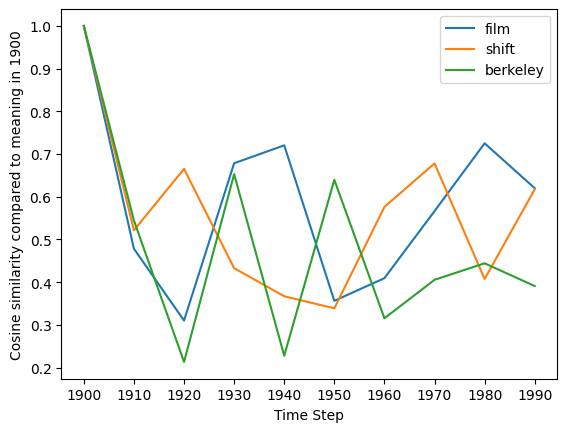

In [238]:
top_3_m1_changing_words = m1_most_changing_words[:3]

# calculate cosine similarity for each word in top_3_m1_changing_words, with itself in each year
top3_words_cos_sim_by_year = []
for w in top_3_m1_changing_words:
    cos_sim = []
    for i in range(10):
        cos_sim.append(cosine_similarity(data['E'][data['w'].index(w)][i].reshape(1,-1), data['E'][data['w'].index(w)][0].reshape(1,-1))[0][0])
    print(cos_sim)
    top3_words_cos_sim_by_year.append(cos_sim)

# plot cosine similarity for each word in top_3_m1_changing_words, with itself in each year
plt.plot(top3_words_cos_sim_by_year[0], label=top_3_m1_changing_words[0])
plt.plot(top3_words_cos_sim_by_year[1], label=top_3_m1_changing_words[1])
plt.plot(top3_words_cos_sim_by_year[2], label=top_3_m1_changing_words[2])
plt.legend()
plt.xlabel("Time Step")
plt.xticks(range(10), range(1900, 2000, 10))
plt.ylabel("Cosine similarity compared to meaning in 1900")
plt.show()
